<img src="./images/xeus-cling.svg" style="width: 50%;"  alt="Jupyter Logo">

<center>A Jupyter kernel for C++ based on the C++ interpreter cling and the native implementation of the Jupyter protocol xeus.</center>

<div style="background: #f1f1f1;
            border: 1px solid grey;
            margin: 16px 0 8px 0;
            text-align: center;
            padding: 8px; ">
    This live demo is powered by
    <div style="margin-left: auto; margin-right: auto; display: flex; max-width: 600px">
        <div style="margin: 20px;"><img src="./images/binder-logo.png" style="height: 40px;" alt="Binder Logo"></div>
        <div style="margin: 20px;"><img src="./images/jupyter-logo.png" style="height: 40px;"  alt="Jupyter Logo"></div>
        <div style="margin: 20px;"><img src="./images/cling-logo.png" style="height: 40px;"  alt="Cling Logo"></div>
    </div>
</div>
<div style="background: #ffeded;
            border: 1px solid grey;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px;">
    <i class="fa-warning fa" 
       style="font-size: 40px;
              line-height: 40px;
              margin: 8px;
              color: #444;">
    </i>
    <div>
    This live demo may not be runnable from behind certain corporate proxies that block the websocket protocol.
    </div>
</div>

## Usage

<div style="background: #efffed;
            border: 1px solid grey;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
    <i class="fa-play fa" 
       style="font-size: 40px;
              line-height: 40px;
              margin: 8px;
              color: #444;">
    </i>
    <div>
    To run the selected code cell, hit <pre style="background: #efffed">Shift + Enter</pre>
    </div>
</div>

## Output and error streams

`std::cout` and `std::cerr` are redirected to the notebook frontend.

In [1]:
#include <iostream>

std::cout << "some output" << std::endl;

some output


In [2]:
std::cerr << "some error" << std::endl;

some error


In [3]:
#include <stdexcept>

In [4]:
throw std::runtime_error("Unknown exception");

Standard Exception: Unknown exception

Omitting the `;` in the last statement of a cell results in an output being printed

In [5]:
int j = 5;

In [6]:
j

5

# Interpreting the C++ programming language

`cling` has a broad support of the features of C++. You can define functions, classes, templates, etc ...

## Functions

In [7]:
double sqr(double a)
{
    return a * a;
}

In [8]:
double a = 2.5;
double asqr = sqr(a);
asqr

6.25

## Classes

In [9]:
class Foo
{
public:

    virtual ~Foo() {}
    
    virtual void print(double value) const
    {
        std::cout << "Foo value = " << value << std::endl;
    }
};

In [10]:
Foo bar;
bar.print(1.2);

Foo value = 1.2


## Polymorphism

In [11]:
class Bar : public Foo
{
public:

    virtual ~Bar() {}
    
    virtual void print(double value) const
    {
        std::cout << "Bar value = " << 2 * value << std::endl;
    }
};

In [12]:
Foo* bar2 = new Bar;
bar2->print(1.2);
delete bar2;

Bar value = 2.4


## Templates

In [13]:
#include <typeinfo>

template <class T>
class FooT
{
public:
    
    explicit FooT(const T& t) : m_t(t) {}
    
    void print() const
    {
        std::cout << typeid(T).name() << " m_t = " << m_t << std::endl;
    }
    
private:
    
    T m_t;
};

template <>
class FooT<int>
{
public:
    
    explicit FooT(const int& t) : m_t(t) {}
    
    void print() const
    {
        std::cout << "m_t = " << m_t << std::endl;
    }
    
private:
    
    int m_t;
};

In [14]:
FooT<double> foot1(1.2);
foot1.print();

d m_t = 1.2


In [15]:
FooT<int> foot2(4);
foot2.print();

m_t = 4


## C++11 / C++14 support

In [16]:
class Foo11
{
public:
    
    Foo11() { std::cout << "Foo11 default constructor" << std::endl; }
    Foo11(const Foo11&) { std::cout << "Foo11 copy constructor" << std::endl; }
    Foo11(Foo11&&) { std::cout << "Foo11 move constructor" << std::endl; }
};

In [17]:
Foo11 f1;
Foo11 f2(f1);
Foo11 f3(std::move(f1));

Foo11 default constructor
Foo11 copy constructor
Foo11 move constructor


In [18]:
#include <vector>

std::vector<int> v = { 1, 2, 3};
auto iter = ++v.begin();
v

{ 1, 2, 3 }

In [19]:
*iter

2

... and also lambda, universal references, `decltype`, etc ...

## Documentation and completion

In [20]:
?std::vector

## Using the `display_data` mechanism

For a user-defined type `T`, implementing the function `xeus::xjson mime_bundle_repr(const T* im)` returning the json mime bundle representation for that type enables the rich rendering in the notebook.

### Image example

In [7]:
#include <string>
#include <fstream>

#include "xtl/xbase64.hpp"
#include "xeus/xjson.hpp"

namespace im
{
    struct image
    {   
        inline image(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);   
            m_buffer << fin.rdbuf();
        }
        
        std::stringstream m_buffer;
    };
    
    xeus::xjson mime_bundle_repr(const image& i)
    {
        auto bundle = xeus::xjson::object();
        bundle["image/png"] = xtl::base64encode(i.m_buffer.str());
        return bundle;
    }
}

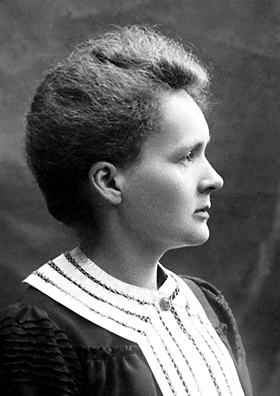

In [8]:
im::image marie("images/marie.png");
marie

### Audio example

In [ ]:
#include <string>
#include <fstream>

#include "xtl/xbase64.hpp"
#include "xeus/xjson.hpp"

namespace au
{
    struct audio
    {   
        inline audio(const std::string& filename)
        {
            std::ifstream fin(filename, std::ios::binary);   
            m_buffer << fin.rdbuf();
        }
        
        std::stringstream m_buffer;
    };
    
    xeus::xjson mime_bundle_repr(const audio& a)
    {
        auto bundle = xeus::xjson::object();
        bundle["text/html"] =
           std::string("<audio controls=\"controls\"><source src=\"data:audio/wav;base64,")
           + xtl::base64encode(a.m_buffer.str()) +
            "\" type=\"audio/wav\" /></audio>";
        return bundle;
    }
}

In [ ]:
au::audio drums("audio/audio.wav");
drums

### Display

In [ ]:
#include "xcpp/xdisplay.hpp"

In [ ]:
xcpp::display(drums);

### Update-display

In [ ]:
#include <string>
#include "xcpp/xdisplay.hpp"

namespace ht
{
    struct html
    {   
        inline html(const std::string& content)
        {
            m_content = content;
        }
        std::string m_content;
    };

    xeus::xjson mime_bundle_repr(const html& a)
    {
        auto bundle = xeus::xjson::object();
        bundle["text/html"] = a.m_content;
        return bundle;
    }
}

// A red rectangle
ht::html rect(R"(
<div style='
    width: 90px;
    height: 50px;
    line-height: 50px;
    background-color: blue;
    color: white;
    text-align: center;'>
Original
</div>)");

In [ ]:
xcpp::display(rect, "some_display_id");

In [ ]:
// Update the rectangle to be blue
rect.m_content = R"(
<div style='
    width: 90px;
    height: 50px;
    line-height: 50px;
    background-color: red;
    color: white;
    text-align: center;'>
Updated
</div>)";

xcpp::display(rect, "some_display_id", true);